<a href="https://colab.research.google.com/github/wayoo2019/Time-Series-analysis/blob/main/475_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount Google Drive to import data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use(style = 'ggplot')
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Question 1

In [3]:
bts = pd.read_csv('/content/drive/MyDrive/hw1/BTS_Air_Rail_Vehicle_Miles.csv')
bts.head()

,Month,Air,Rail,Vehicle
0,Jan-90,35153577,454115779,163.28
1,Feb-90,32965187,435086002,153.25
2,Mar-90,39993913,568289732,178.42
3,Apr-90,37981886,568101697,178.68
4,May-90,38419672,539628385,188.88


Convert difference date format into one format

In [4]:
# add a new column to check if it is mmm-YY (=0) or Y-mmm (=1)
bts['Check'] = bts['Month'].str.split("-", expand=True)[0].str.isdigit()*1
# set mmm-00 (=2) in order to convert to Y2000
bts['Check'].loc[bts['Month'].str.split("-", expand=True)[1] == '00'] = 2
bts['Time'] = bts['Month'].str.split("-", expand=True)[0] + '-' + '19' + bts['Month'].str.split("-", expand=True)[1]

bts["Time"].loc[bts["Check"] == 1] = bts['Month'].str.split("-", expand=True)[1] + '-' + '200' + bts['Month'].str.split("-", expand=True)[0] 
bts["Time"].loc[bts["Check"] == 2] = bts['Month'].str.split("-", expand=True)[0] + '-' + '20' + bts['Month'].str.split("-", expand=True)[1]
bts


,Month,Air,Rail,Vehicle,Check,Time
0,Jan-90,35153577,454115779,163.28,0,Jan-1990
1,Feb-90,32965187,435086002,153.25,0,Feb-1990
2,Mar-90,39993913,568289732,178.42,0,Mar-1990
3,Apr-90,37981886,568101697,178.68,0,Apr-1990
4,May-90,38419672,539628385,188.88,0,May-1990
...,...,...,...,...,...,...
167,3-Dec,57795908,489403554,237.60,1,Dec-2003
168,4-Jan,53447972,410338691,217.30,1,Jan-2004
169,4-Feb,52608801,389778365,210.40,1,Feb-2004
170,4-Mar,63600019,453014590,247.50,1,Mar-2004


In [5]:
bts['Time'] = pd.to_datetime(bts['Time'])

In [6]:
bts = bts.drop(columns='Check', axis=1)
bts

,Month,Air,Rail,Vehicle,Time
0,Jan-90,35153577,454115779,163.28,1990-01-01
1,Feb-90,32965187,435086002,153.25,1990-02-01
2,Mar-90,39993913,568289732,178.42,1990-03-01
3,Apr-90,37981886,568101697,178.68,1990-04-01
4,May-90,38419672,539628385,188.88,1990-05-01
...,...,...,...,...,...
167,3-Dec,57795908,489403554,237.60,2003-12-01
168,4-Jan,53447972,410338691,217.30,2004-01-01
169,4-Feb,52608801,389778365,210.40,2004-02-01
170,4-Mar,63600019,453014590,247.50,2004-03-01


## 1.a

The goal of this study is descriptive

## 1.b



*   t=1,2,3 refer to three continuous time periods: Jan-1990, Feb-1900, and Mar-1990

*   t=1 refer to Jan-1990



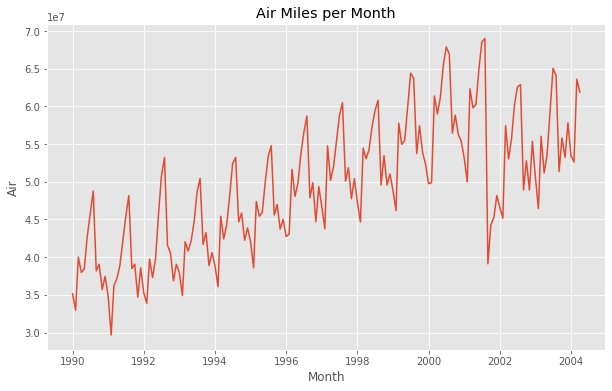

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x="Time", y="Air ", data=bts)
ax.set_title("Air Miles per Month")
ax.set_xlabel("Month")
ax.set_ylabel("Air")
plt.show()

##1.c

y1 = 35153577, y2 = 32965187, y3 = 39993913. These are the total miles per month that passengers took by Air

In [8]:
bts['Air '].head(3)

0    35153577
1    32965187
2    39993913
Name: Air , dtype: int64

# Question 2

##2.a

From below figure we can see 'Air' and 'Vehicle' have same pattern. Both have:

1.   Level
2.   Seasonality
3.   Trend
4.   Noise





No handles with labels found to put in legend.


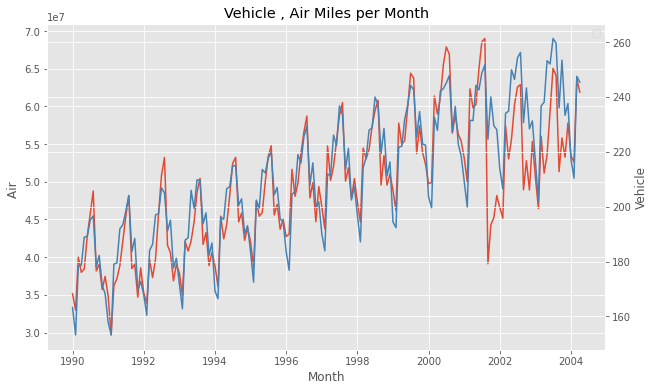

In [27]:
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(x="Time", y="Air ", data=bts)

ax1.set_title("Vehicle , Air Miles per Month")
ax1.set_xlabel("Month")
ax1.set_ylabel("Air ")

ax2 = ax1.twinx()
sns.lineplot(x="Time", y="Vehicle", data=bts, color='steelblue')
ax2.set_ylabel("Vehicle")

plt.show()


##2.b

The Rail miles took by passeangers declined from 1990 to 1997, and then slightly increased from 1998 to 2004

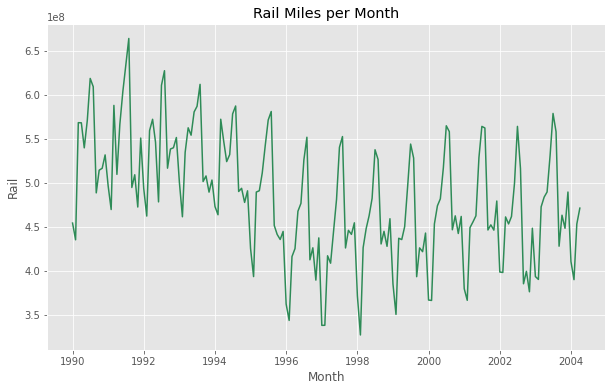

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x="Time", y="Rail", data=bts, color="seagreen")
ax.set_title("Rail Miles per Month")
ax.set_xlabel("Month")
ax.set_ylabel("Rail")
plt.show()

#Question 3

In [11]:
shampoo = pd.read_csv('/content/drive/MyDrive/hw1/ShampooSales.csv')
shampoo.head()

,Month,Shampoo Sales
0,Jan-95,266.0
1,Feb-95,145.9
2,Mar-95,183.1
3,Apr-95,119.3
4,May-95,180.3


In [12]:
shampoo['Month'] = pd.to_datetime(shampoo['Month'])

3.a

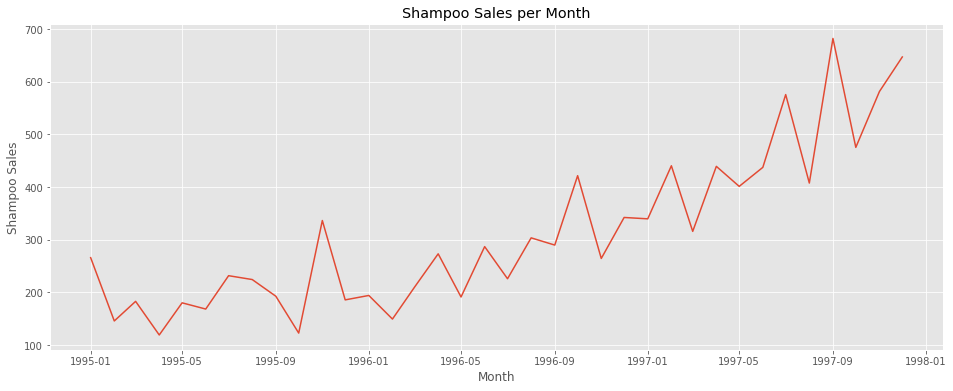

In [13]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(x="Month", y="Shampoo Sales", data=shampoo)
ax.set_title("Shampoo Sales per Month")
ax.set_xlabel("Month")
ax.set_ylabel("Shampoo Sales")
plt.show()



##3.b

Level, Trend, Noise

##3.c

There is no obvious seasonality of shampoo sales over the years because this demand is constant in daily life. The peak sales period may related to on sale promotion

#Question 4

In [14]:
beverage = pd.read_csv('/content/drive/MyDrive/hw1/Beverages_Shipment_2020.csv')
beverage

,Month,Dollars (in Millions)
0,Jan-92,3519
1,Feb-92,3803
2,Mar-92,4332
3,Apr-92,4251
4,May-92,4661
...,...,...
175,6-Aug,7039
176,6-Sep,6440
177,6-Oct,6446
178,6-Nov,6717


Align date format

In [15]:
# add a new column to check if it is mmm-YY (=0) or Y-mmm (=1)
beverage['Check'] = beverage['Month'].str.split("-", expand=True)[0].str.isdigit()*1
# set mmm-00 (=2) in order to convert to Y2000
beverage['Check'].loc[beverage['Month'].str.split("-", expand=True)[1] == '00'] = 2
beverage['Time'] = beverage['Month'].str.split("-", expand=True)[0] + '-' + '19' + beverage['Month'].str.split("-", expand=True)[1]

beverage["Time"].loc[beverage["Check"] == 1] = beverage['Month'].str.split("-", expand=True)[1] + '-' + '200' + beverage['Month'].str.split("-", expand=True)[0] 
beverage["Time"].loc[beverage["Check"] == 2] = beverage['Month'].str.split("-", expand=True)[0] + '-' + '20' + beverage['Month'].str.split("-", expand=True)[1]
# np.where(bts['Check'] == 1, bts['Time']== '200', bts['Time']=='19')
beverage['Time'] = pd.to_datetime(beverage['Time'])
beverage


,Month,Dollars (in Millions),Check,Time
0,Jan-92,3519,0,1992-01-01
1,Feb-92,3803,0,1992-02-01
2,Mar-92,4332,0,1992-03-01
3,Apr-92,4251,0,1992-04-01
4,May-92,4661,0,1992-05-01
...,...,...,...,...
175,6-Aug,7039,1,2006-08-01
176,6-Sep,6440,1,2006-09-01
177,6-Oct,6446,1,2006-10-01
178,6-Nov,6717,1,2006-11-01


##4.a

Yes, there is distinct cyclic pattern (seansonality) that is repeated within each year.

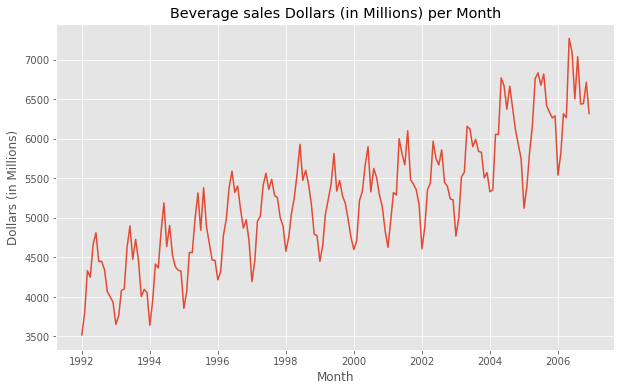

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x="Time", y="Dollars (in Millions)", data=beverage)
ax.set_title("Beverage sales Dollars (in Millions) per Month")
ax.set_xlabel("Month")
ax.set_ylabel("Dollars (in Millions)")
plt.show()

##4.b

Plot autocorrelation

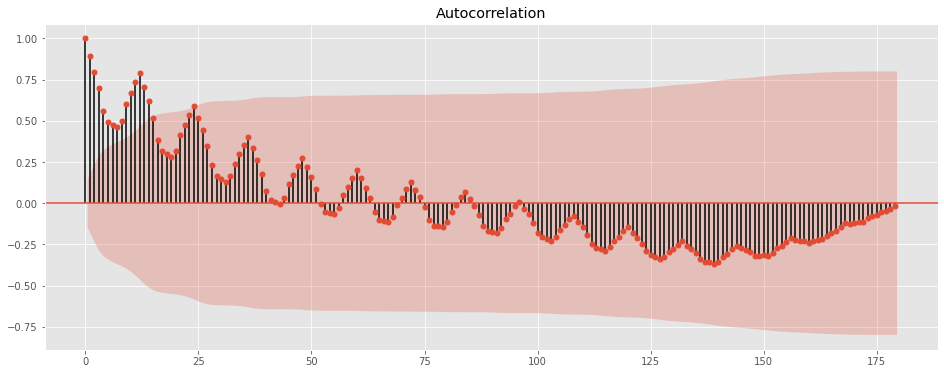

In [17]:
plt.rc("figure", figsize=(16,6))
sm.graphics.tsa.plot_acf(beverage['Dollars (in Millions)'], lags=np.arange(len(beverage)))
plt.show()

##4.c

One period of season is about 12 periods(Month)

#Question 5

In [18]:
coal = pd.read_csv('/content/drive/MyDrive/hw1/Coal_Production_US_2020.csv')
coal.head()

,Year,"Coal Production, Short Tons in Thousands"
0,1949,480570
1,1950,560388
2,1951,576335
3,1952,507424
4,1953,488239


##5.a

Plot coal production data and autocorrelation as below

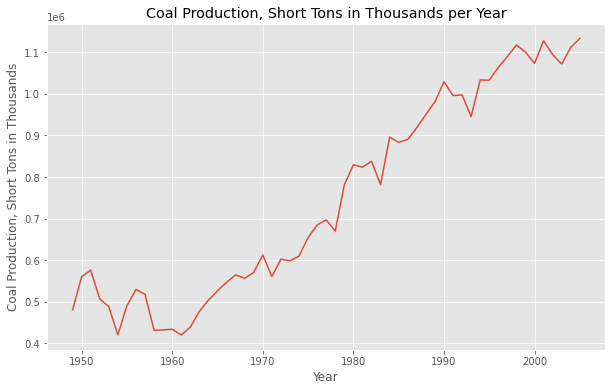

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x="Year", y="Coal Production, Short Tons in Thousands", data=coal)
ax.set_title("Coal Production, Short Tons in Thousands per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Coal Production, Short Tons in Thousands")
plt.show()

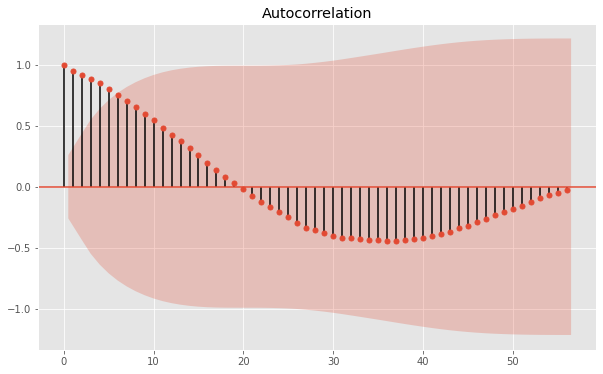

In [20]:
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_acf(coal['Coal Production, Short Tons in Thousands'], lags=np.arange(len(coal)))
plt.show()

##5.b

This is the nonstationary time series data. It has a obvious trend (growing of coal production by year

##5.c

Plot the first difference, compute acf of first difference

Text(0.5, 1.0, '1st order Differencing')

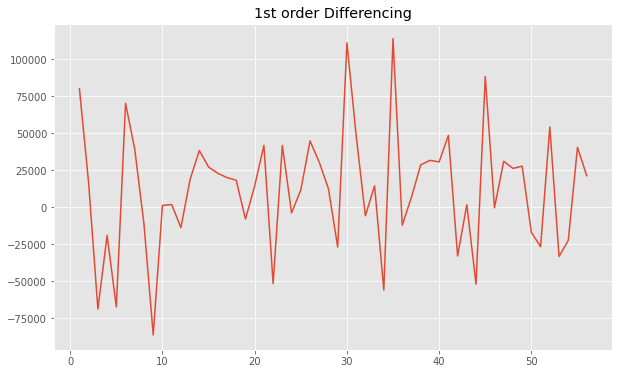

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(coal['Coal Production, Short Tons in Thousands'].diff())
ax.set_title('1st order Differencing')


In [22]:
sm.tsa.stattools.acf(coal['Coal Production, Short Tons in Thousands'].diff().dropna())

array([ 1.        , -0.16085967, -0.06714158, -0.13655373, -0.00301077,
        0.1334392 , -0.01786494,  0.06670142, -0.09823738, -0.03096248,
        0.22487343, -0.15112771,  0.01460527, -0.08721892,  0.05468611,
        0.09203731, -0.12630418,  0.15053755, -0.15152412,  0.03241399,
        0.08627211, -0.16914768,  0.05367319, -0.19897887,  0.11506634,
        0.08575602, -0.12097769, -0.13678428, -0.07906736,  0.20872575,
       -0.12943975,  0.06469956, -0.04750979, -0.02746452,  0.11583545,
        0.0198119 , -0.17465359, -0.03066461, -0.02191181,  0.13427694,
       -0.04334723])

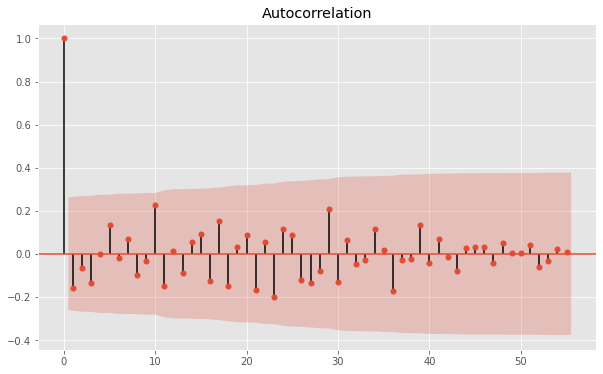

In [23]:
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_acf(coal['Coal Production, Short Tons in Thousands'].diff().dropna(), lags=np.arange(len(coal)-1))
plt.show()

##5.d

The 1st order difference removes the increasing trend, the time series data now is stationary.